# Übung 7 - Lineare Regression

## Einfache Lineare Regression

In [1]:
### Daten einlesen
## Daten von Kaggle: https://www.kaggle.com/datasets/lainguyn123/student-performance-factors

# google drive "vorbereiten"
from google.colab import drive
drive.mount('/content/drive')

# CSV-File einlesen - mit Library pandas
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/DSAI_intern/Daten/StudentPerformanceFactors.csv')

Mounted at /content/drive


In [2]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


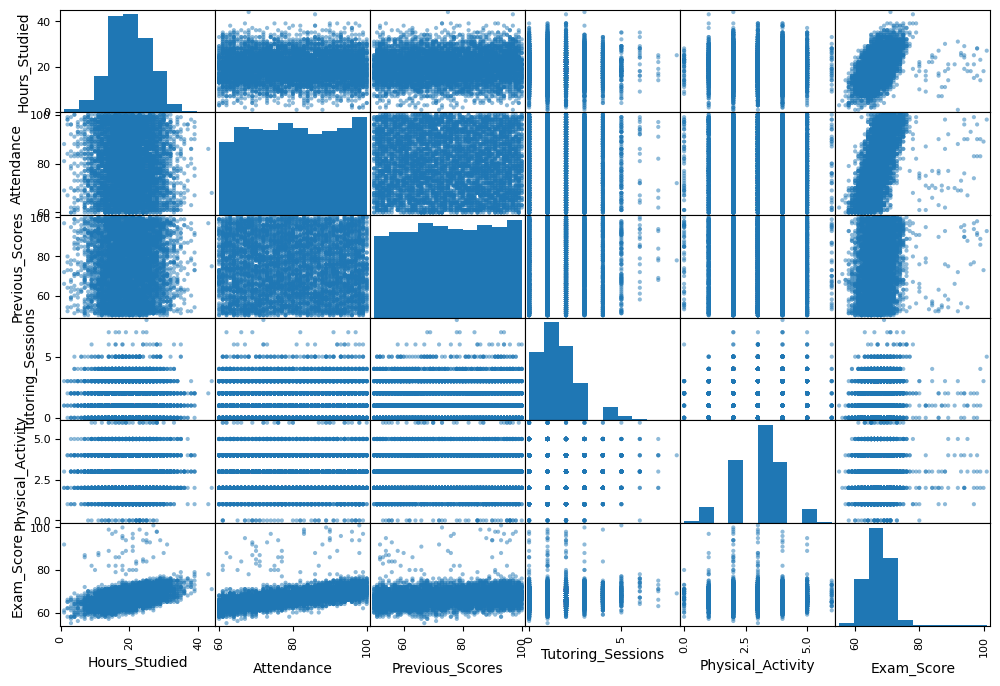

In [3]:
# Small Multiples
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

## Auswahl der Attribute
attributes = ["Hours_Studied", "Attendance", "Previous_Scores","Tutoring_Sessions", "Physical_Activity", "Exam_Score"]
scatter_matrix(df[attributes], figsize=(12, 8))
plt.show()

In [ ]:
# Daten bereinigen
## Bei diesem Datensatz nicht notwendig, da bereits geschehen

In [4]:
# Daten auswählen
## Bspw. wollen wir den Exam_Score anhand der Hours_Studied vorhersagen
X = df['Hours_Studied']
y = df['Exam_Score']

# Daten in Trainings- und Testdaten aufsplitten
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Da einfache Lineare Regression (nur 1 Feature) gemacht wird, ist eine Skalierung / Standardisierung nicht notwendig

In [5]:
# Modell trainieren --> Wichtig: NUR auf den Trainingsdaten!
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train.values.reshape(-1, 1), y_train)

LinearRegression()

In [6]:
# Modell evaluieren
from sklearn.metrics import mean_squared_error, r2_score

## Für die Bewertung müssen erst die Vorhersagen für die Testdaten gemacht werden
y_pred = model.predict(X_test.values.reshape(-1, 1))

## MSE und R^2 berechnen
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 10.85592128879332
R-squared: 0.2319868674542106


--> Immerhin etwas mehr wie 23% der Variation kann mit dem diesem einfachen Modell erklärt werden

Text(0, 0.5, 'Exam_Score')

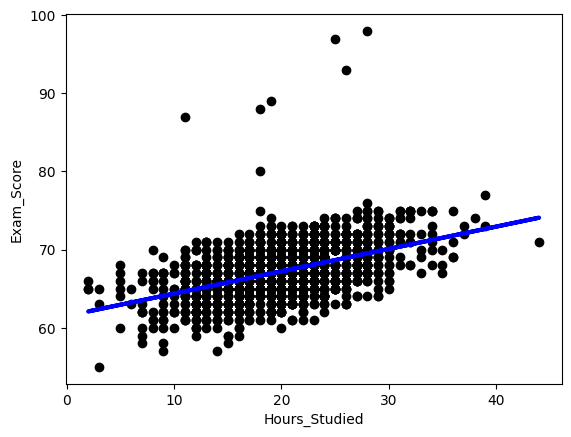

In [7]:
# Grafisch darstellen: Scatterplot der Daten von "Exam_Score" gegenüber "Hours_Studied" und die Lineare Regression plotten
import matplotlib.pyplot as plt

# Scatter Plot
plt.scatter(X_test, y_test, color='black')

# Lineare Regression darstellen
plt.plot(X_test, y_pred, color='blue', linewidth=3)

# Achsenbeschriftung
plt.xlabel('Hours_Studied')
plt.ylabel('Exam_Score')

--> Im Scatterplott ist wschön ersichtlich, dass die lineare Regression keine so schlechte Annäherung ist...

## Multiple Lineare Regression

In [8]:
### Daten einlesen
## Daten von Kaggle: https://www.kaggle.com/datasets/lainguyn123/student-performance-factors

# google drive "vorbereiten"
from google.colab import drive
drive.mount('/content/drive')

# CSV-File einlesen - mit Library pandas
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/DSAI_intern/Daten/StudentPerformanceFactors.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
# Die einfache lineare Regression war nicht sonderlich gut... probieren wir es also mit einer multiplen linearen Regression
## versuchen wir es mit Hours_Studied, Attendance, Previous_Scores, Access_to_Resources, Teacher_Quality, Motivation_Level

## Datenbereinigung wiederum nicht möglich, da dies bereits gemacht wurde

## Daten auswählen
X = df[['Hours_Studied', 'Attendance', 'Previous_Scores', 'Access_to_Resources', 'Teacher_Quality', 'Motivation_Level']]
y = df['Exam_Score']

## Access_to_Resources, Teacher_Quality und Motivation_Level sind kategorisches Features --> One-Hot-Encoding
X = pd.get_dummies(X, columns=['Access_to_Resources', 'Teacher_Quality', 'Motivation_Level'])

## Die generierten Dummies ausgeben
display(X.head())

## Daten müssen nicht skaliert werden, da keine grossen Unterschiede in den Grössenordnungen vorliegt

,Hours_Studied,Attendance,Previous_Scores,Access_to_Resources_High,Access_to_Resources_Low,Access_to_Resources_Medium,Teacher_Quality_High,Teacher_Quality_Low,Teacher_Quality_Medium,Motivation_Level_High,Motivation_Level_Low,Motivation_Level_Medium
0,23,84,73,True,False,False,False,False,True,False,True,False
1,19,64,59,False,False,True,False,False,True,False,True,False
2,24,98,91,False,False,True,False,False,True,False,False,True
3,29,89,98,False,False,True,False,False,True,False,False,True
4,19,92,65,False,False,True,True,False,False,False,False,True


In [10]:
# Modell trainieren
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# das Modell muss nicht gefitted / trainiert werden, das passiert im k-fold cross-validating

In [11]:
# Modell evaluieren mit k-fold cross-validation
import numpy as np
from sklearn.model_selection import cross_val_score, KFold

## k-fold Aufsplittung
k = 5
cv = KFold(n_splits=k, shuffle=True, random_state=42)

# cross-Validierung
scores_mse = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_squared_error')
scores_r2 = cross_val_score(model, X, y, cv=cv)

# Ergebnisse ausgeben
print(f'Cross-Validation Scores (MSE): {scores_mse}')
print(f'Durchschnittlicher MSE-Score: {np.mean(scores_mse)}')
print(f'Cross-Validation Scores (R^2): {scores_r2}')
print(f'Durchschnittlicher R^2-Score: {np.mean(scores_r2)}')

Cross-Validation Scores (MSE): [-4.66057243 -5.15849213 -3.07983377 -7.08465316 -9.04444983]
Durchschnittlicher MSE-Score: -5.805600263893917
Cross-Validation Scores (R^2): [0.67028309 0.62665099 0.75255465 0.60028266 0.48296602]
Durchschnittlicher R^2-Score: 0.6265474841212246


--> Jetzt können wir immerhin rund 60% der Variation erklären...

In [13]:
# Schauen wir uns noch an, wie gross die jeweiligen Einflüsse sind --> Koeffizienten
# Daten in Trainings- und Testdaten aufsplitten
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)
for feature, coef in zip(X.columns, model.coef_):
  print(f"{feature}: {coef}")

Hours_Studied: 0.2893158665193678
Attendance: 0.1997394493841917
Previous_Scores: 0.046201764980567384
Access_to_Resources_High: 0.9892726124212666
Access_to_Resources_Low: -0.9938030204649613
Access_to_Resources_Medium: 0.004530408043694686
Teacher_Quality_High: 0.6688934328806619
Teacher_Quality_Low: -0.3811587337354815
Teacher_Quality_Medium: 0.1254740064983844
Motivation_Level_High: 0.5302283377056896
Motivation_Level_Low: -0.5214597701503632
Motivation_Level_Medium: -0.008768567555326507


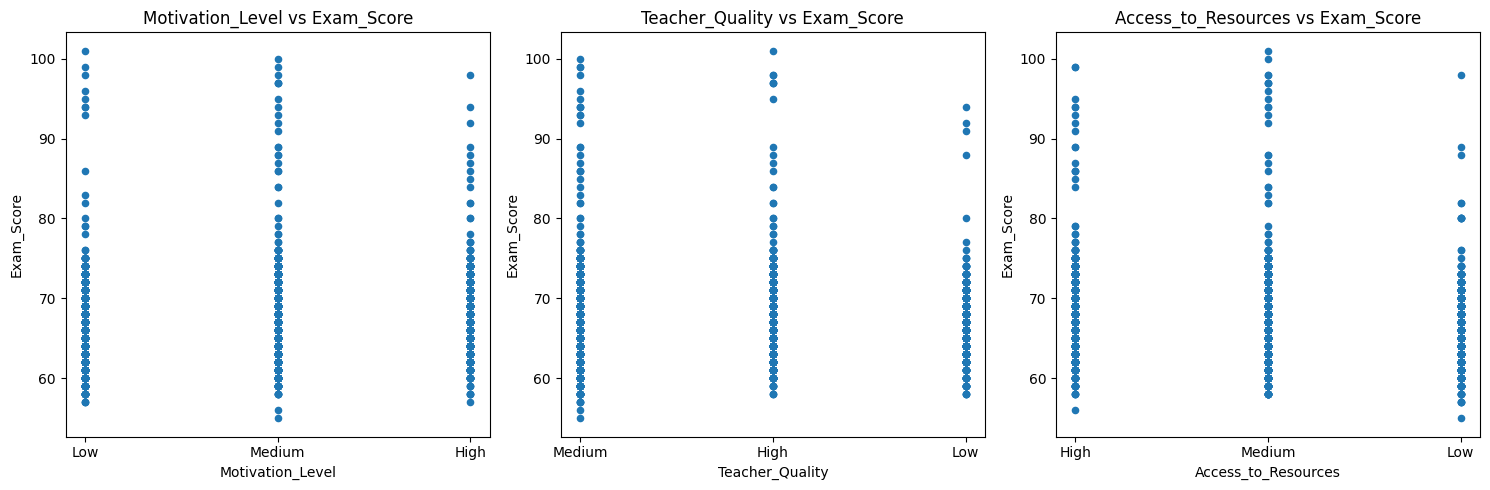

In [14]:
# Scatterplots von Motivation_Level vs. Exam_Score, Teacher_Quality vs. Exam_Score und Access_to_Resources vs. Exam_Score
import matplotlib.pyplot as plt

df.dropna(subset=['Teacher_Quality'], inplace=True)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Motivation_Level vs Exam_Score
df.plot.scatter(x='Motivation_Level', y='Exam_Score', ax=axes[0])
axes[0].set_title('Motivation_Level vs Exam_Score')

# Teacher_Quality vs Exam_Score
df.plot.scatter(x='Teacher_Quality', y='Exam_Score', ax=axes[1])
axes[1].set_title('Teacher_Quality vs Exam_Score')

# Access_to_Resources vs Exam_Score
df.plot.scatter(x='Access_to_Resources', y='Exam_Score', ax=axes[2])
axes[2].set_title('Access_to_Resources vs Exam_Score')

plt.tight_layout()
plt.show()

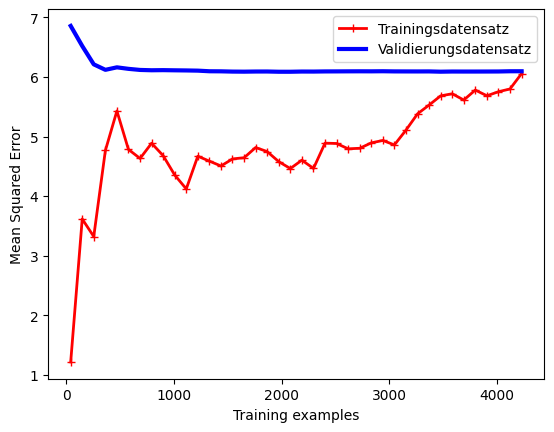

In [15]:
# Lernkurve
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

model = LinearRegression()

train_sizes, train_scores, val_scores = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.01, 1.0, 40), cv=5, scoring='neg_mean_squared_error')
train_errors = -train_scores.mean(axis=1)
valid_errors = -val_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, "r-+", linewidth=2, label="Trainingsdatensatz")
plt.plot(train_sizes, valid_errors, "b-", linewidth=3, label="Validierungsdatensatz")
plt.xlabel("Training examples")
plt.ylabel("Mean Squared Error")
plt.legend()

plt.show()

## Polynomielle Regression

In [ ]:
### Daten einlesen
## Daten von Kaggle: https://www.kaggle.com/datasets/lainguyn123/student-performance-factors

# google drive "vorbereiten"
from google.colab import drive
drive.mount('/content/drive')

# CSV-File einlesen - mit Library pandas
import pandas as pd
df = pd.read_csv('/content/drive/My Drive/DSAI_intern/Daten/StudentPerformanceFactors.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Daten auswählen
## Bspw. wollen wir den Exam_Score anhand der Attendance vorhersagen
X = df['Attendance']
y = df['Exam_Score']

# Daten in Trainings- und Testdaten aufsplitten
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Polynomielle Features generieren
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train.values.reshape(-1, 1))
X_test_poly = poly.transform(X_test.values.reshape(-1, 1))

In [ ]:
# Modell trainieren (das fitten findet wieder in k-fold validation statt)
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [ ]:
# Modell evaluieren mit k-fold cross-validation
import numpy as np
from sklearn.model_selection import cross_val_score, KFold

## k-fold Aufsplittung
k = 5
cv = KFold(n_splits=k, shuffle=True, random_state=42)

# cross-Validierung
scores_mse = cross_val_score(model, X_train_poly, y_train, cv=cv, scoring='neg_mean_squared_error')
scores_r2 = cross_val_score(model, X_train_poly, y_train, cv=cv)

# Ergebnisse ausgeben
print(f'Cross-Validation Scores (MSE): {scores_mse}')
print(f'Durchschnittlicher MSE-Score: {np.mean(scores_mse)}')
print(f'Cross-Validation Scores (R^2): {scores_r2}')
print(f'Durchschnittlicher R^2-Score: {np.mean(scores_r2)}')

Cross-Validation Scores (MSE): [ -9.50863842 -10.8175264   -9.25491952 -11.06499424 -10.4688141 ]
Durchschnittlicher MSE-Score: -10.222978537432162
Cross-Validation Scores (R^2): [0.34120169 0.33687254 0.33524862 0.3306015  0.33301916]
Durchschnittlicher R^2-Score: 0.33538870102285767


In [ ]:
model.fit(X_train_poly, y_train)
print(model.coef_)

[ 0.          0.29626979 -0.00061938]


# Stochastischer Gradientenabstieg für lineare Regression

In [ ]:
# Standardimplementation der lineare Regression ist die geschlossene Form...
import pandas as pd

# Import data
points = pd.read_csv("https://bit.ly/2KF29Bd")

x = points.values[:,0].reshape(-1, 1)
y = points.values[:,1].reshape(-1, 1)

from sklearn.linear_model import SGDRegressor

# Lernrate ist 0.01, 1000 Iterationen
model = SGDRegressor(learning_rate='constant', eta0=0.01, max_iter=1000)
model.fit(x,y)

print("y = {0}x + {1}".format(model.coef_[0],model.intercept_))

y = 2.1345218524283034x + [1.90023908]


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## **Nun sind Sie an der Reihe...**